In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"

titanic_df = pd.read_csv(main_path + 'train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 01

In [22]:
s = titanic_df[titanic_df['Embarked'] == 'S']
print(f'사우스햄튼 항의 탑승자 수 {s.shape[0]}')
c = titanic_df[titanic_df['Embarked'] == 'C']
print(f'세르부르 항의 탑승자 수 {c.shape[0]}')
q = titanic_df[titanic_df['Embarked'] == 'Q']
print(f'퀸즈타운 항의 탑승자 수 {q.shape[0]}')

s_surv = s[s['Survived'] == 1]
print(f'사우스햄튼 항의 생존자 수 {s_surv.shape[0]/s_surv.shape[0]}')
print(f'사우스햄튼 항 탑승자 중 생존율 {s_surv.shape[0]/s.shape[0]*100:.3f}%')

c_surv = c[c['Survived'] == 1]
print(f'세르부르 항의 생존자 수 {c_surv.shape[0]}')
print(f'세르부르 항 탑승자 중 생존율 {c_surv.shape[0]/c.shape[0]*100:.3f}%')

q_surv = q[q['Survived'] == 1]
print(f'퀸즈타운 항의 생존자 수 {q_surv.shape[0]}')
print(f'퀸즈타운 항 탑승자 중 생존율 {q_surv.shape[0]/q.shape[0]*100:.3f}%')

사우스햄튼 항의 탑승자 수 644
세르부르 항의 탑승자 수 168
퀸즈타운 항의 탑승자 수 77
사우스햄튼 항의 생존자 수 1.0
사우스햄튼 항 탑승자 중 생존율 33.696%
세르부르 항의 생존자 수 93
세르부르 항 탑승자 중 생존율 55.357%
퀸즈타운 항의 생존자 수 30
퀸즈타운 항 탑승자 중 생존율 38.961%


## 02

[[Text(0, 0, 'male'), Text(1, 0, 'female')]]

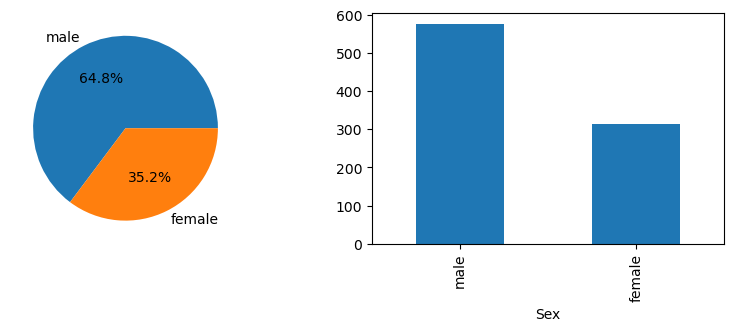

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
labels = ['male', 'female']

titanic_df['Sex'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set(ylabel='')

titanic_df['Sex'].value_counts().plot.bar(ax=ax[1])
ax[1].set(xticklabels=labels)

## 03

Text(0, 0.5, 'Num of People')

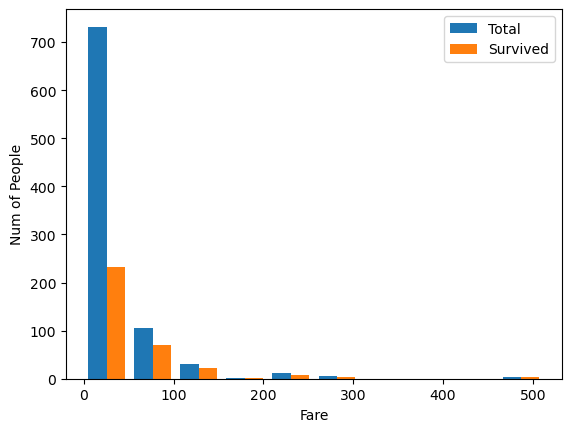

In [29]:
survived = titanic_df[titanic_df.Survived == 1]
plt.hist([titanic_df['Fare'], survived['Fare']])
plt.legend(['Total', 'Survived'])
plt.xlabel('Fare')
plt.ylabel('Num of People')

## 04

In [30]:
main_path = "https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/"

# 타이타닉호의 train.csv 데이터와 유사하나 Survived 열이 없다
test_df = pd.read_csv(main_path + 'test.csv')

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
titanic_df.groupby('Embarked').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812
